<a href="https://colab.research.google.com/github/jblack333/ML-1/blob/main/Rios-Black_DS_ProjectPart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Electricity Load of Houston
###  ICPE 638 - Spring 2024

[Haoyu Niu](https://orcid.org/0000-0002-7052-8877), [Enrique Z. Losoya](https://orcid.org/0000-0001-7763-3349), and [Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University.
Updated: Jan. 6, 2024.

**(30 points)**

### **Data Set**
A Cross-Domain Data Hub to Track the Impact of COVID-19 on U.S. Electricity Markets

https://github.com/tamu-engineering-research/COVID-EMDA

Particularly, we will use the electricity load data of Houston.

https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv

### **Problem**
1. Carry out component decomposition for the electricity load of Houston

2. Perform KPSS and ADF Stationarity Tests, explain your results.

3. Build an ARIMA model with an optimal order (p, d, q)
   
4.  *(Extra credit)* Make a prediction for the next 30 days, plot it out, and explain your results.

## Download and Process Dataset
**Please don't change this section!**

You can use the dataframe `df` for the rest of your analysis.

In [1]:
DATA_URL="https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv"

In [29]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
# read the data and change the index to datetime index to facilitate the analysis.
df=pd.read_csv(DATA_URL)
df["date"] = pd.to_datetime(df["date"])
df.set_index(pd.to_datetime(df.date, format="%Y-%m-%d"), inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.head(5)

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,8791.8,8569.7,8326.4,8137.5,8011.9,7978.1,8057.1,8125.8,8289.2,8646.5,...,9957.6,9987.9,9943.9,10181.0,10583.5,10451.0,10230.6,10014.8,9667.7,9287.7
2017-01-02,8836.8,8588.2,8480.8,8506.0,8644.7,8887.0,9176.5,9323.8,9559.9,9602.7,...,10937.1,11037.0,10931.5,10859.0,11112.1,10893.9,10594.2,10196.7,9568.1,8935.5
2017-01-03,8516.6,8238.2,8102.8,8094.3,8265.7,8816.3,9615.5,10009.8,10102.3,10235.3,...,11022.6,10988.9,10883.8,10882.0,11092.8,10889.1,10577.2,10100.1,9488.8,8916.9
2017-01-04,8462.0,8316.5,8259.6,8336.3,8636.6,9357.1,10504.8,10955.0,10944.0,11119.8,...,10713.0,10602.9,10638.3,11099.4,11605.9,11578.6,11416.8,11010.9,10392.6,9784.5
2017-01-05,9472.0,9198.3,9051.1,9031.1,9237.9,9836.5,10685.2,10931.8,10841.5,10912.8,...,10692.5,10696.2,10791.9,11130.9,11378.8,11311.2,11194.9,10882.2,10416.8,9959.7


In [4]:
df['load']= df.sum(axis=1)
df = df[["load"]]
df.head(5)

,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3


<Axes: xlabel='date'>

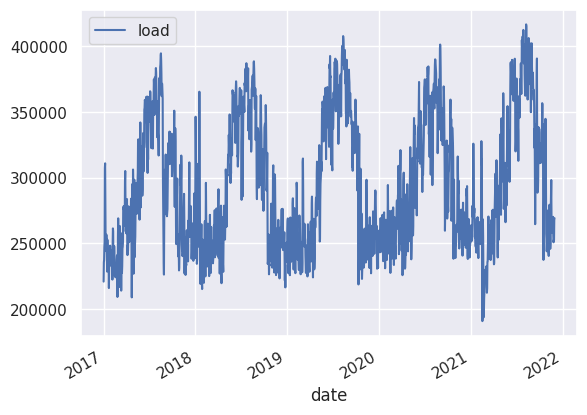

In [5]:
df.plot()

## Component Decomposition

In [18]:

df=pd.DataFrame({"t": t,
                  "X": f_final,
                  "Trend" : f_trend,
                  "Seasonality": f_seasonality,
                  "Noise": f_noise
                  })

In [19]:
df

,t,X,Trend,Seasonality,Noise
0,-1.000000,-3.848260,-2.841471,-2.738836,1.732046
1,-0.987976,-5.686518,-2.794309,-2.368443,-0.523765
2,-0.975952,-2.972232,-2.747165,-1.861740,1.636673
3,-0.963928,-0.643570,-2.700073,-1.247888,3.304391
4,-0.951904,-1.917542,-2.653067,-0.562217,1.297742
...,...,...,...,...,...
495,4.951904,4.077431,7.061384,-2.990900,0.006946
496,4.963928,8.463249,7.582241,-2.849223,3.730231
497,4.975952,5.258957,8.140264,-2.543565,-0.337741
498,4.987976,6.981868,8.728200,-2.091518,0.345185


<Axes: >

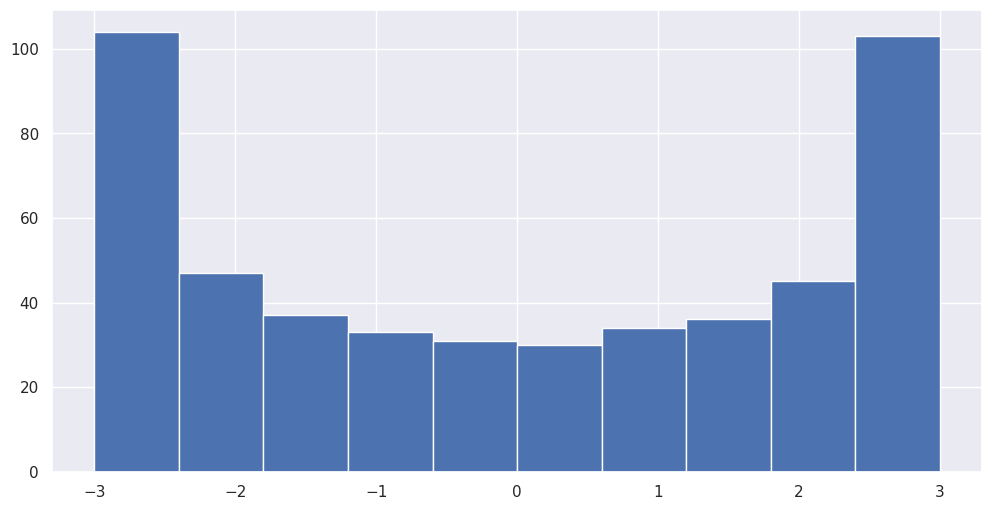

In [20]:
df["Seasonality"].hist()

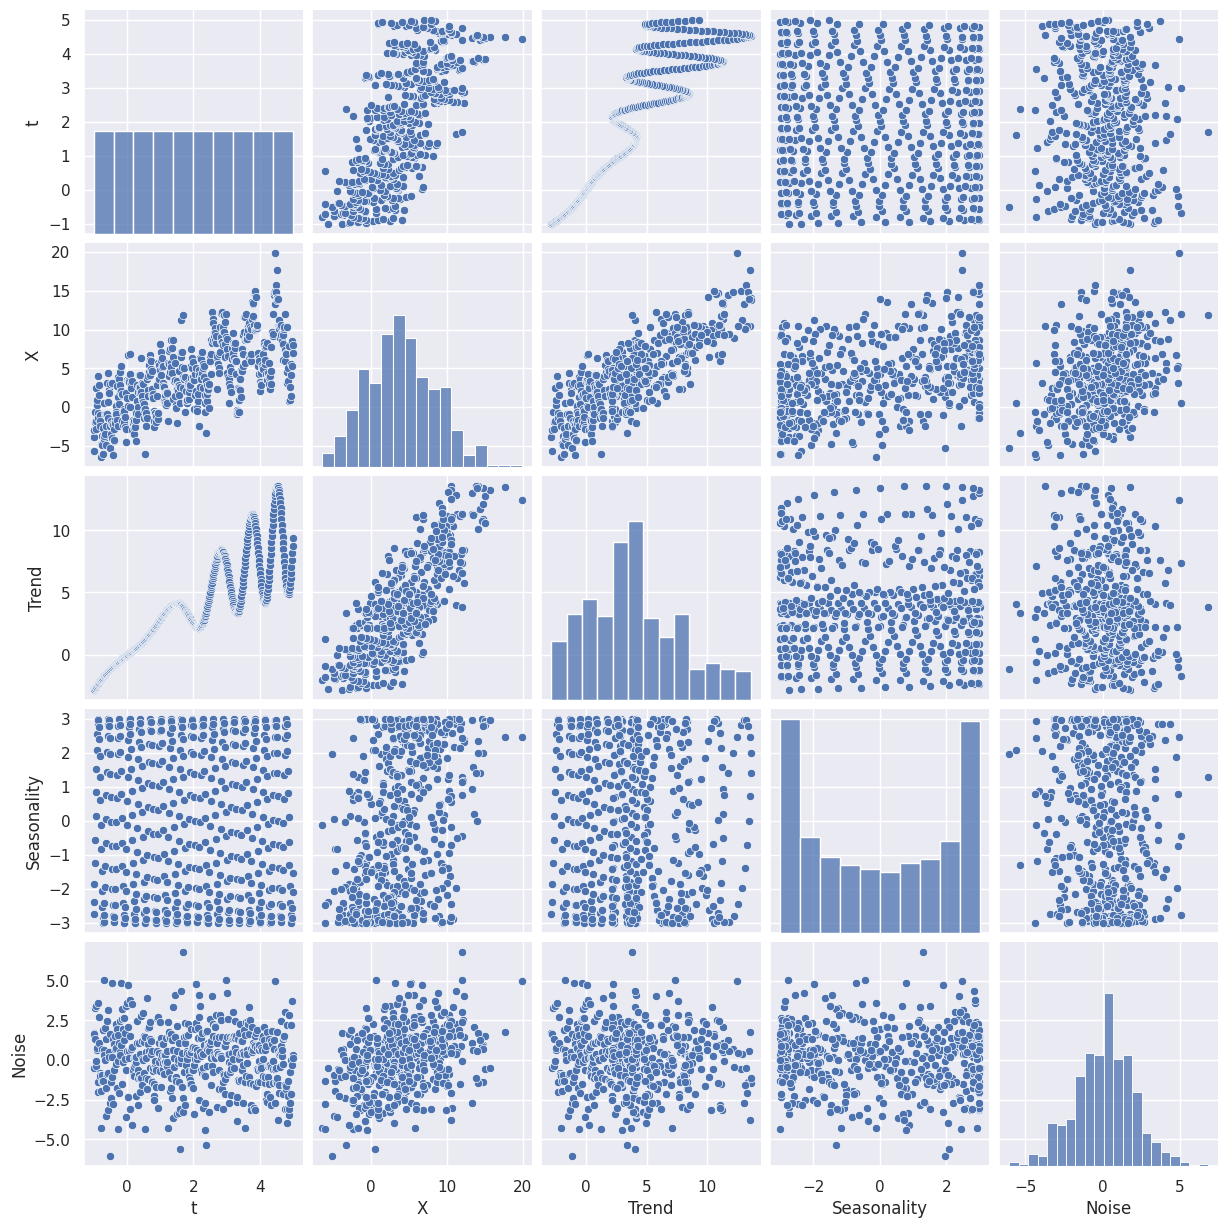

In [21]:
sns.pairplot(data=df)

<Axes: >

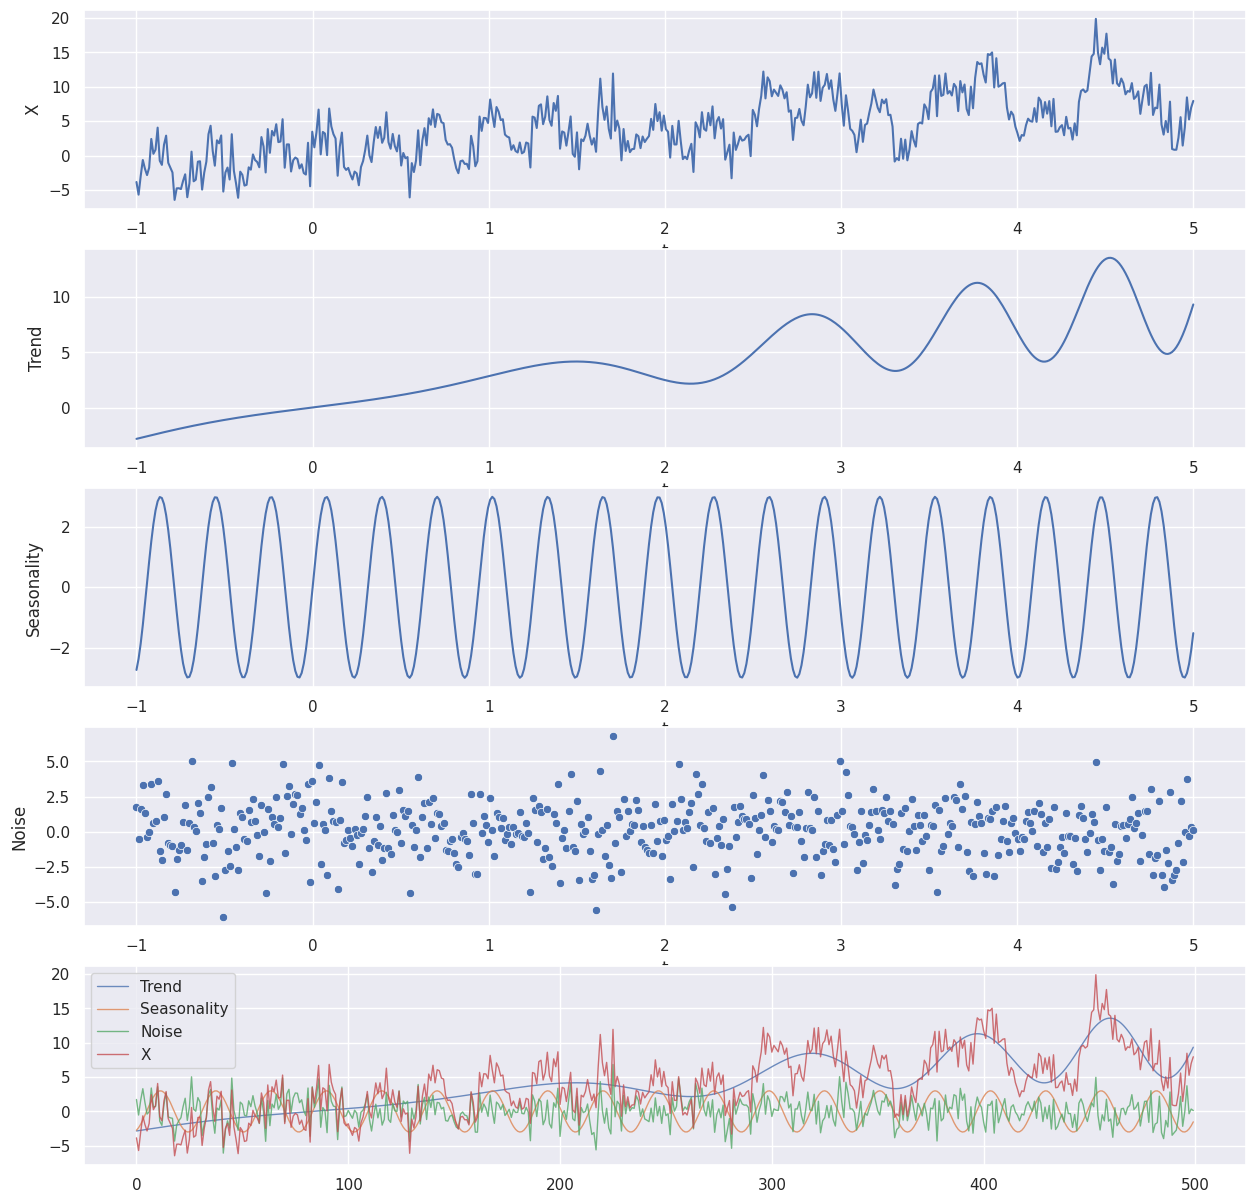

In [22]:
fig, axes = plt.subplots(5,1, figsize=(15, 15))
sns.lineplot(x='t', y='X', data=df, ax=axes[0])
sns.lineplot(x='t', y='Trend', data=df, ax=axes[1])
sns.lineplot(x='t', y='Seasonality', data=df, ax=axes[2])
sns.scatterplot(x='t', y='Noise', data=df, ax=axes[3])

sns.set(rc={'figure.figsize':(12,6)})
sns.lineplot(data=df[["Trend", "Seasonality", "Noise", "X"]], legend="full",lw=1, dashes=False, alpha=0.8, ax=axes[4])

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['X'], period=26, model='additive')

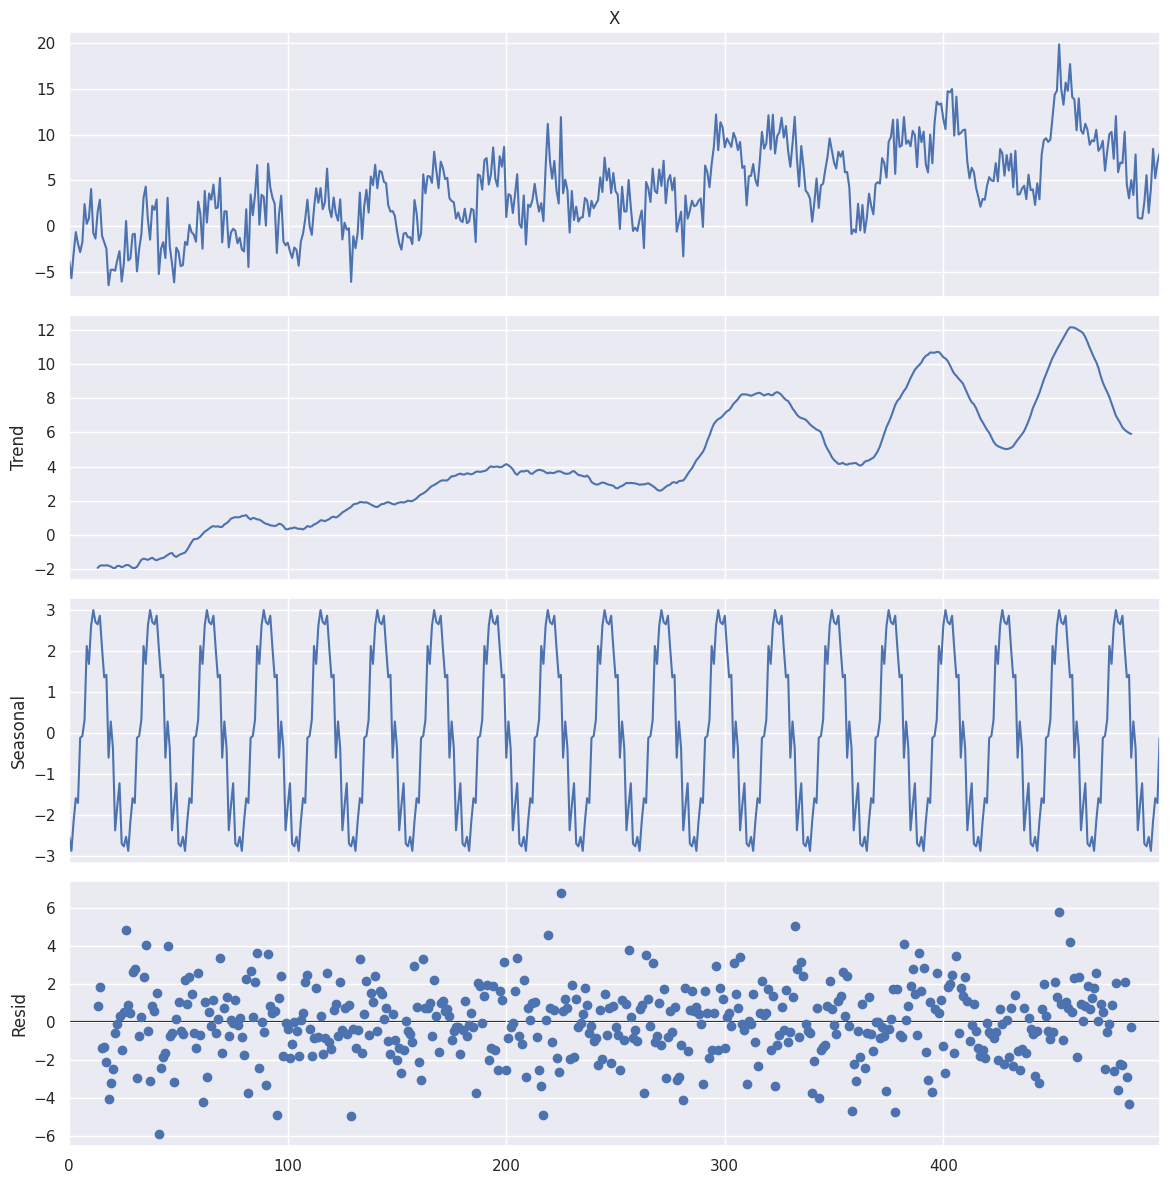

In [58]:
sns.set(rc={'figure.figsize':(12,12)})
result.plot();

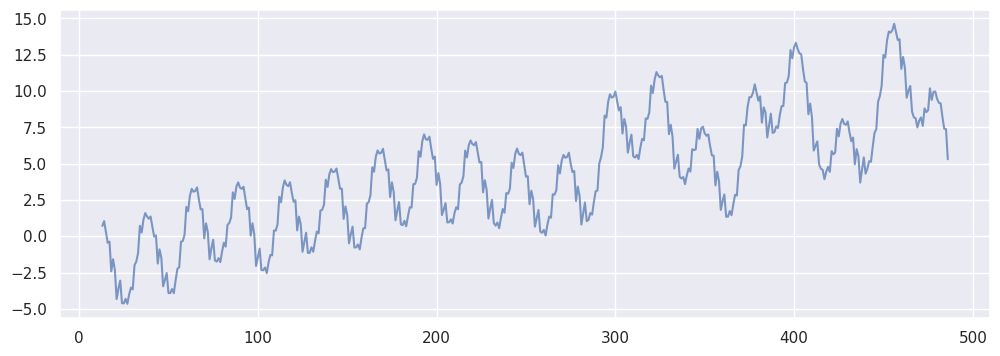

In [59]:
plt.figure(figsize=(12,4))
#plt.plot(f_seasonality)
#plt.plot(df["X"])
plt.plot(result.seasonal + result.trend, alpha=0.7)

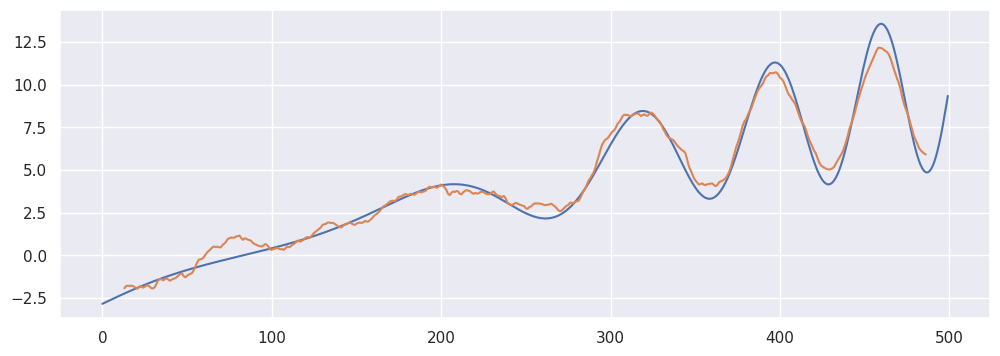

In [60]:
plt.figure(figsize=(12,4))
plt.plot(f_trend)
plt.plot(result.trend)

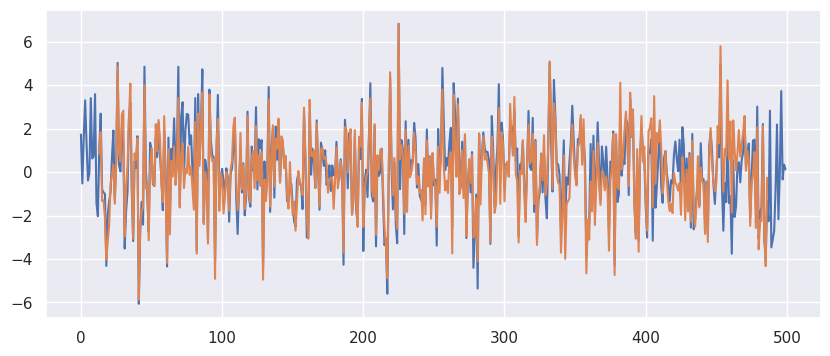

In [61]:
plt.figure(figsize=(10,4))
plt.plot(f_noise)
plt.plot(result.resid)

In [62]:
np.mean(f_noise)

0.1030832231610822

In [63]:
np.mean(result.resid)

-0.01011881452742567

In [64]:
np.abs(np.std(f_noise)-np.std(result.resid))/np.std(f_noise)

0.02375315528913717

(array([  6.,  14.,  42.,  81., 131., 118.,  58.,  19.,   3.,   2.]),
 array([-5.87857452, -4.60886487, -3.33915521, -2.06944556, -0.79973591,
         0.46997375,  1.7396834 ,  3.00939305,  4.27910271,  5.54881236,
         6.81852202]),
 <BarContainer object of 10 artists>)

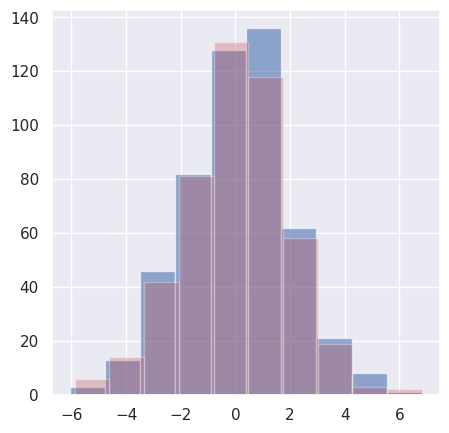

In [65]:
plt.figure(figsize=(5,5))
plt.hist(f_noise, alpha=0.6)
plt.hist(result.resid, alpha=0.3, color="r")

In [ ]:
#Decomposed residual is normally distributed.

In [66]:
df["detrend"] = df["X"] - result.trend
df["stationary"] = df["X"] - result.trend - result.seasonal

<Axes: >

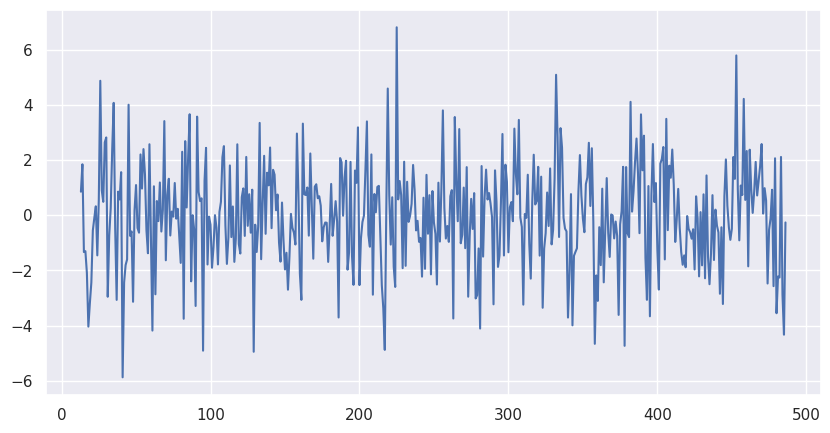

In [67]:
df["stationary"].plot(figsize=(10,5))

In [75]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [81]:
kpss_test(df['Seasonality'])

Results of KPSS Test:
Test Statistic            0.011712
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-75-f676df5b375f>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [82]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [84]:
adf_test(df['Seasonality'])

Results of Dickey-Fuller Test:
Test Statistic                -1.161187e+14
p-value                        0.000000e+00
#Lags Used                     1.000000e+00
Number of Observations Used    4.980000e+02
Critical Value (1%)           -3.443549e+00
Critical Value (5%)           -2.867361e+00
Critical Value (10%)          -2.569870e+00
dtype: float64


In [ ]:
# Significance level of .05 the KPSS test the null cannot be rejected, the series is stationary. At the same significance level the ADF test null is rejected, the series is stationary.

##   ARIMA Model with optimal order (p, d, q)

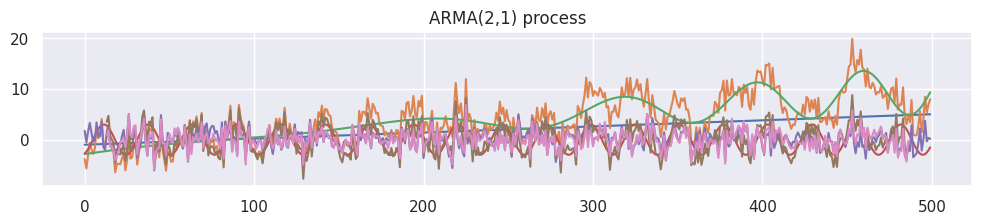

In [90]:
plt.figure(figsize=(12,2))
plt.plot(df)
plt.title('ARMA(2,1) process')
plt.show()

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.gridspec as gridspec

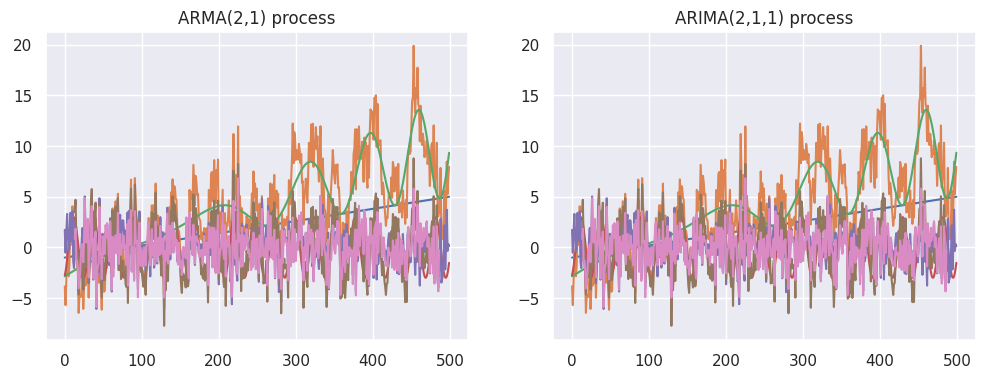

In [95]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(df)
plt.title('ARMA(2,1) process')
plt.subplot(122)
plt.plot(df)
plt.title('ARIMA(2,1,1) process')
plt.show()

##   ARIMA Model Forecasting (Extra)